## Import Required Libraries

In [1]:
import numpy as np #Provides support for numerical operations and array manipulation.
import pandas as pd #Offers data structures and data analysis tools for working with structured data.
import math #Provides mathematical functions and operations.
import matplotlib #2D plotting library for creating static, animated, or interactive visualizations.
import matplotlib.pyplot as plt
import seaborn as sns #provides an interface for creating attractive and informative statistical graphics.
import plotly.express as px #creating interactive and expressive visualizations.
import plotly.graph_objects as go #Provides more control over customizing Plotly figures and subplots. 
from plotly.subplots import make_subplots #Allows for creating subplots within Plotly figures.
import seaborn.objects as so #Custom objects for statistical data visualization.

# Jupyter Notebook magic command for displaying plots inline.
%matplotlib inline


sns.set_style('dark') #Set Seaborn's plotting style to 'dark'.

# Scikit-Learn: A machine learning library that provides tools for data preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Scikit-Learn Models: Import various machine learning models for classification tasks.
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

### Import the datasets

In [2]:
train = pd.read_csv('data/churn-bigml-80.csv')
test = pd.read_csv('data/churn-bigml-20.csv')
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#check dataset shape
print('Shape of Train Data: ', train.shape)
print('Shape of Test Data: ',test.shape)

Shape of Train Data:  (2666, 20)
Shape of Test Data:  (667, 20)


##### Check Data Types of Columns

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
# Convert dtype of categorical columns
cat_cols = ['State','International plan','Voice mail plan','Churn']

train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols[:-1]] = test[cat_cols[:-1]].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   2666 non-null   category
 1   Account length          2666 non-null   int64   
 2   Area code               2666 non-null   int64   
 3   International plan      2666 non-null   category
 4   Voice mail plan         2666 non-null   category
 5   Number vmail messages   2666 non-null   int64   
 6   Total day minutes       2666 non-null   float64 
 7   Total day calls         2666 non-null   int64   
 8   Total day charge        2666 non-null   float64 
 9   Total eve minutes       2666 non-null   float64 
 10  Total eve calls         2666 non-null   int64   
 11  Total eve charge        2666 non-null   float64 
 12  Total night minutes     2666 non-null   float64 
 13  Total night calls       2666 non-null   int64   
 14  Total night charge      

In [6]:
# Check for missing values
train.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

##### Check for Outliers

In [7]:
# Check for outliers
num_cols = train.select_dtypes(include=['int', 'float']).columns

# Exclude 'Area Code' from num_cols
num_cols = [col for col in num_cols if col != 'Area code']

i = ['tr' + str(n) for n in range(1, 16)]

fig = make_subplots(rows=5, cols=3, 
                    subplot_titles=[f'{col} Box Plot' for col in num_cols],
                    vertical_spacing=0.03)

for index, (col, trace) in enumerate(zip(num_cols, i)):
    trace = go.Box(y=train[col], boxmean=True, name=col)
    fig.add_trace(trace, row=(index // 3) + 1, col=(index % 3) + 1)

fig.update_layout(height=2000, width=1000, 
                  title_text="Outlier Check in Numerical Columns", 
                  showlegend=False)
    
fig.show()

In [8]:
# Replace outliers with median

def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        
        median = df[col].median()
        
        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])
        
replace_outliers(train, num_cols)

# Exploratory Data Analysis

**Check Correlation**

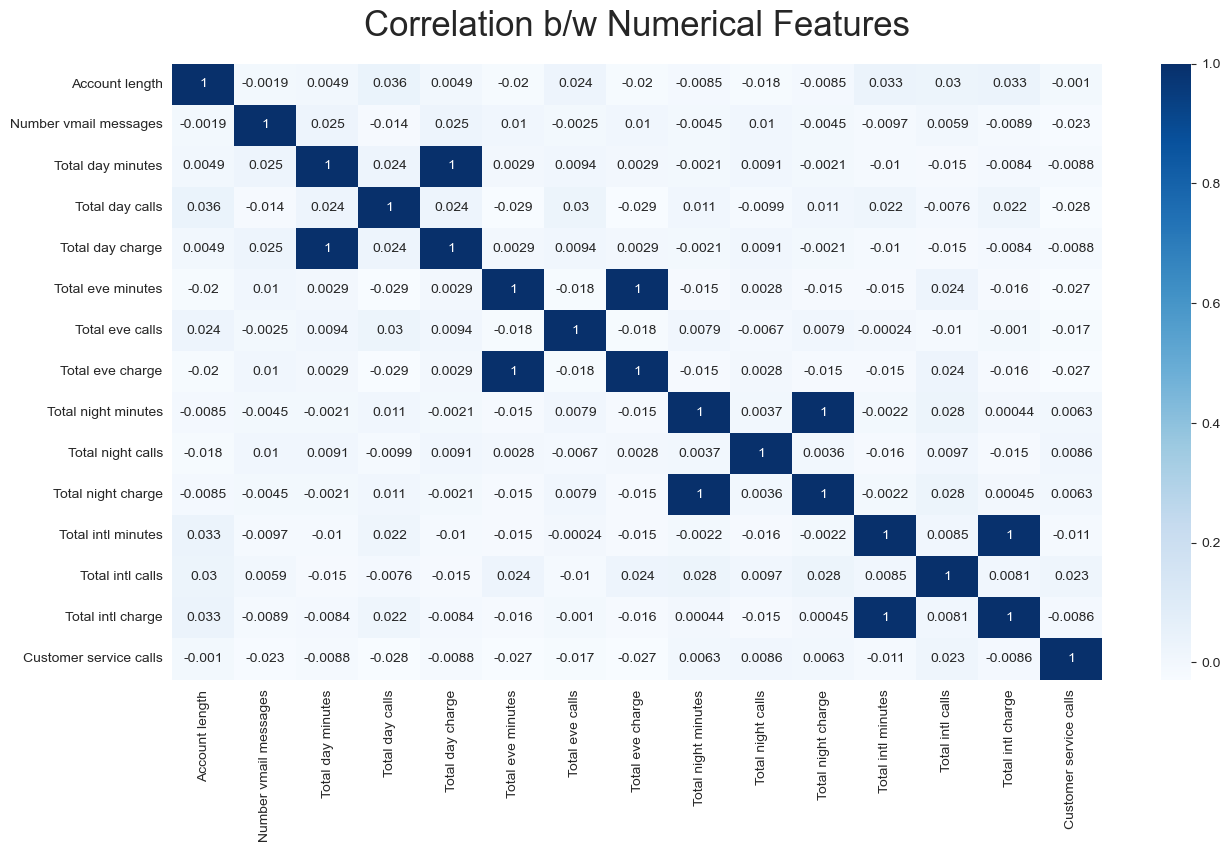

In [9]:
#Correlation
table = train[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

In [10]:
# Removing completely correlated columns
for data in [train, test]:
    data.drop(columns=['Total day charge', 
                       'Total eve charge', 
                      'Total night charge',
                      'Total intl charge'], inplace=True)

train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0,False
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,False
2,NJ,137.0,415,No,No,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,False
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,61.9,88.0,196.9,89.0,6.6,7.0,2.0,False
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,False


**Impact of Categorical Features on Churn**

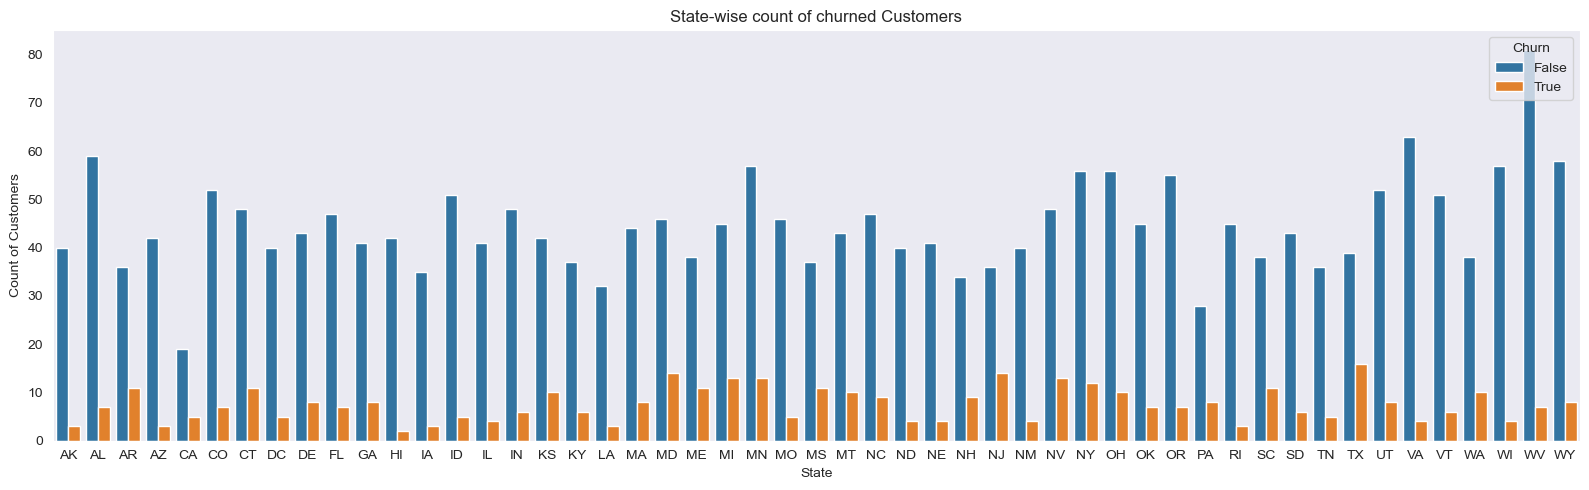

In [11]:
plt.figure(figsize=(16, 5))
sns.countplot(data=train, x='State', hue='Churn')
plt.title("State-wise count of churned Customers")
plt.ylabel("Count of Customers")
plt.legend(title='Churn', loc='upper right', labels=['False', 'True'])
plt.tight_layout()
plt.show()

**Check Distribution of Target Variable**

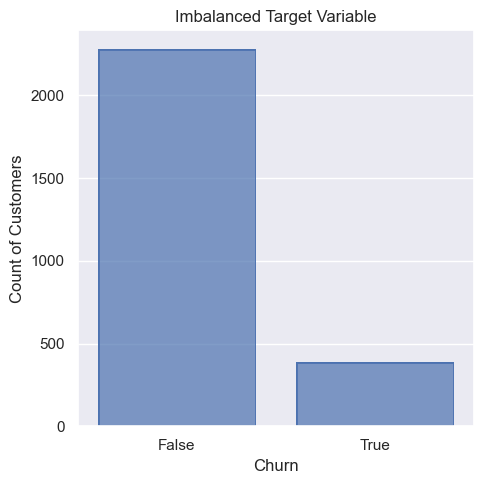

In [12]:
p = (
    so.Plot(train, x='Churn')
    .add(so.Bar(),so.Count())
    .layout(size=(5,5))
    .label(title="Imbalanced Target Variable",y="Count of Customers")
)

p.show()

**Perform Some Feature Engineering**

In [13]:
#Generate column for total minutes, total calls
#Map the voice mail plan and international plan to int
#drop the aggregated columns
#Drop state and Area Code columns

for data in [train,test]:
    data['Total_minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes']
    data['Total_calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls']
    data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0}) 
    data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
    data.drop(columns= ['State', 'Area code'], inplace= True)
    data.drop(columns=['Total day calls','Total eve calls', 'Total night calls', 
                       'Total day minutes', 'Total eve minutes', 'Total night minutes'], inplace=True)
    
train['Churn'] = train['Churn'].map({True: 1, False: 0}) 
train.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Customer service calls,Churn,Total_minutes,Total_calls
0,128.0,0,1,25.0,10.0,3.0,1.0,0,707.2,300.0
1,107.0,0,1,26.0,13.7,3.0,1.0,0,611.5,329.0
2,137.0,0,0,0.0,12.2,5.0,0.0,0,527.2,328.0
3,84.0,1,0,0.0,6.6,7.0,2.0,0,558.2,248.0
4,75.0,1,0,0.0,10.1,3.0,3.0,0,501.9,356.0


# Data Modelling

**Data Scaling**

In [14]:
num_cols = train.select_dtypes(include=[float, int]).columns
cat_cols = ['International plan','Voice mail plan']
scaler=StandardScaler()
scaled_cols = scaler.fit_transform(train[num_cols])
train_scaled=pd.DataFrame(scaled_cols, columns=num_cols)
train_scaled[cat_cols] = train[cat_cols]
train_scaled.head()

,Account length,Number vmail messages,Total intl minutes,Total intl calls,Customer service calls,Total_minutes,Total_calls,International plan,Voice mail plan
0,0.720662,1.254590,-0.111636,-0.611979,-0.299585,1.454097,-0.016550,0,1
1,0.178553,1.328321,1.322592,-0.611979,-0.299585,0.347856,0.850327,0,1
2,0.952995,-0.588687,0.741148,0.366747,-1.365931,-0.626607,0.820434,0,0
3,-0.415185,-0.588687,-1.429576,1.345473,0.766761,-0.268264,-1.570948,1,0
4,-0.647517,-0.588687,-0.072873,-0.611979,1.833108,-0.919062,1.657419,1,0


In [15]:
scaled_cols_test = scaler.transform(test[num_cols])
test_scaled=pd.DataFrame(scaled_cols_test, columns=num_cols)
test_scaled[cat_cols] = test[cat_cols]
test_scaled.head()

,Account length,Number vmail messages,Total intl minutes,Total intl calls,Customer service calls,Total_minutes,Total_calls,International plan,Voice mail plan
0,0.436701,-0.588687,-0.615554,-0.122616,-0.299585,1.970806,-1.002995,0,0
1,-0.905665,-0.588687,0.934963,0.856110,2.899454,-0.173476,0.910111,0,0
2,1.572548,-0.588687,-1.894731,2.324200,2.899454,2.657438,-0.255688,0,0
3,0.281812,-0.588687,-1.003183,0.856110,0.766761,-1.665803,0.282373,0,0
4,-1.318700,-0.588687,0.314756,-1.590706,-0.299585,-0.789596,0.461727,0,0


**Data Splitting**

In [16]:
x= train_scaled
x[cat_cols] = x[cat_cols].astype(int)
y = pd.Series(train['Churn'])

In [17]:
x.head()

,Account length,Number vmail messages,Total intl minutes,Total intl calls,Customer service calls,Total_minutes,Total_calls,International plan,Voice mail plan
0,0.720662,1.254590,-0.111636,-0.611979,-0.299585,1.454097,-0.016550,0,1
1,0.178553,1.328321,1.322592,-0.611979,-0.299585,0.347856,0.850327,0,1
2,0.952995,-0.588687,0.741148,0.366747,-1.365931,-0.626607,0.820434,0,0
3,-0.415185,-0.588687,-1.429576,1.345473,0.766761,-0.268264,-1.570948,1,0
4,-0.647517,-0.588687,-0.072873,-0.611979,1.833108,-0.919062,1.657419,1,0


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: category
Categories (2, int64): [0, 1]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2132, 9), (534, 9), (2132,), (534,))

**Model Evaluation with Cross Validation**

In [20]:
models=[
    #Ensemble
    RandomForestClassifier(),
    
    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [21]:
# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, x, y, cv=5, 
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,RandomForestClassifier,89.900000,81.000000,41.000000,54.100000
1,XGBClassifier,89.000000,70.900000,42.000000,52.600000


In [22]:
best_model=RandomForestClassifier()

best_model.fit(x_train, y_train)
train_pred = best_model.predict(x_train)
test_pred = best_model.predict(x_test)

best_model.score(x_test, y_test)

0.8726591760299626

**Confusion Matrix for Random Forest Classifier**

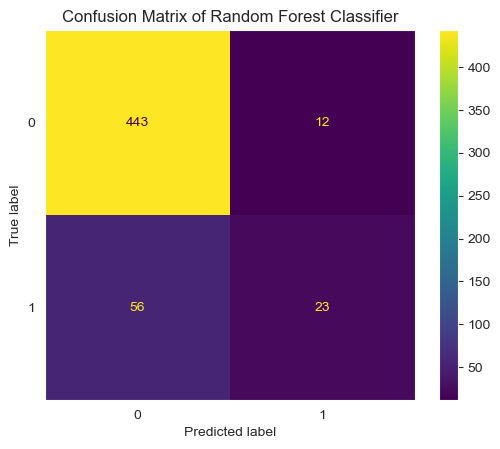

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

**Visualization of Feature Weights**

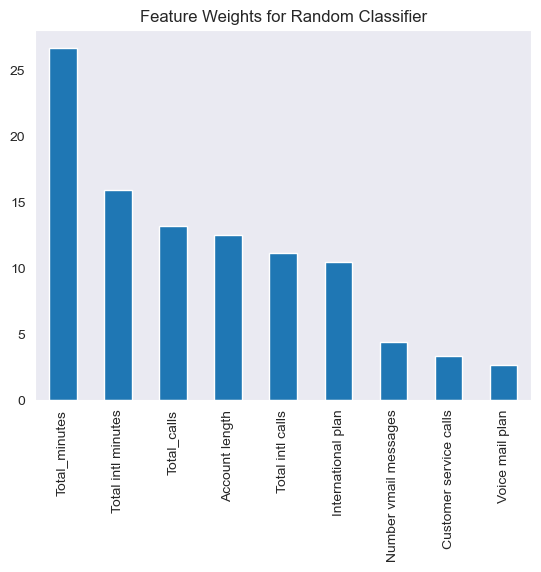

In [24]:
feature_weights = pd.Series((np.round(best_model.feature_importances_,3))*100, 
                            index=x_train.columns.values).sort_values(ascending=False)

feature_weights.plot(kind='bar')
plt.title('Feature Weights for Random Classifier')
plt.show()

**Submit the Predictions**

In [25]:
# Make predictions on the test_scaled data
predictions = best_model.predict(test_scaled)

# Create a DataFrame with predictions and convert numeric values to boolean
submit = pd.DataFrame({'Churn': predictions})
submit['Churn'] = submit['Churn'].astype(bool)

submit.head()

,Churn
0,True
1,False
2,True
3,False
4,False
